In [43]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 

In [44]:
data=pd.read_csv('/content/diamonds.csv')

In [45]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [46]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [48]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [49]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

droping unwanted columns

In [50]:
df=data.drop(['Unnamed: 0','depth','table','x','y','z'],axis=1)

In [51]:
df.head(2)

,carat,cut,color,clarity,price
0,0.23,Ideal,E,SI2,326
1,0.21,Premium,E,SI1,326


In [52]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
price        int64
dtype: object

In [53]:
df['price']=df.price.astype(float)
df.dtypes

carat      float64
cut         object
color       object
clarity     object
price      float64
dtype: object

### Data Visualisation

Text(0.5, 1.0, 'Diamont price distribution ')

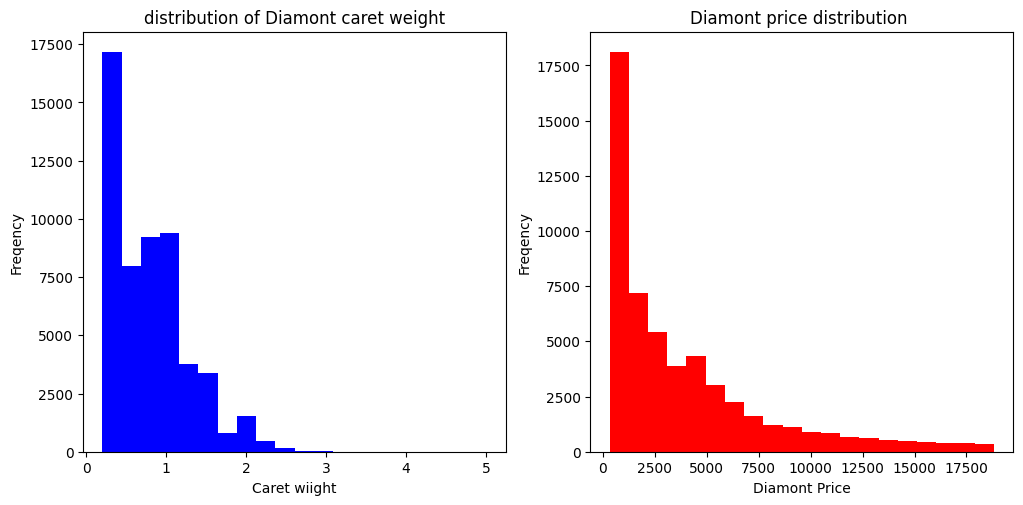

In [54]:
plt.figure(figsize=[12,12])
plt.subplot(221)
#carat weight distribution
plt.hist(df['carat'],bins=20,color='b')
plt.xlabel("Caret wiight")
plt.ylabel("Freqency")
plt.title("distribution of Diamont caret weight")
plt.subplot(222)
#distribution of price value
plt.hist(df['price'],bins=20,color='r')
plt.xlabel("Diamont Price")
plt.ylabel("Freqency")
plt.title("Diamont price distribution ")




Create an independent and dependent

In [55]:
df.head(1)

,carat,cut,color,clarity,price
0,0.23,Ideal,E,SI2,326.0


In [56]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
label=l1.fit_transform(df['cut'])
l1.classes_

array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object)

In [57]:
label

array([2, 3, 1, ..., 4, 3, 2])

In [58]:
df['cut_label']=label

In [59]:
df.head(2)

,carat,cut,color,clarity,price,cut_label
0,0.23,Ideal,E,SI2,326.0,2
1,0.21,Premium,E,SI1,326.0,3


In [60]:
l2=LabelEncoder()
label=l2.fit_transform(df['clarity'])
df['clarity_label']=label
df.head(2)

,carat,cut,color,clarity,price,cut_label,clarity_label
0,0.23,Ideal,E,SI2,326.0,2,3
1,0.21,Premium,E,SI1,326.0,3,2


In [61]:
df['color']=df['color'].map({'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7,'NA':8})

In [62]:
df['color']

0        2
1        2
2        2
3        6
4        7
        ..
53935    1
53936    1
53937    1
53938    5
53939    1
Name: color, Length: 53940, dtype: int64

In [63]:
df.head()

,carat,cut,color,clarity,price,cut_label,clarity_label
0,0.23,Ideal,2,SI2,326.0,2,3
1,0.21,Premium,2,SI1,326.0,3,2
2,0.23,Good,2,VS1,327.0,1,4
3,0.29,Premium,6,VS2,334.0,3,5
4,0.31,Good,7,SI2,335.0,1,3


devide the data into dependent and independent

In [64]:
y=df['price']
y.head(1)

0    326.0
Name: price, dtype: float64

In [65]:
x=df.drop(['price','cut','clarity'],axis=1)
x.head(1)

,carat,color,cut_label,clarity_label
0,0.23,2,2,3


training the data set 

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [67]:
len(x_train)

43152

In [68]:
len(y_test)

10788

In [69]:
len(df)

53940

Standard Scaler method

In [71]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)



1.Linear Regression Model

In [72]:
from sklearn.linear_model import LinearRegression
linear= LinearRegression()
linear.fit(x_train,y_train)
pred=linear.predict(x_test)

In [73]:
from sklearn.metrics import r2_score
lr= r2_score(y_test,pred)*100
print(lr)

87.76517206528275


2.Decision Tree Regression

In [75]:
from sklearn.tree import DecisionTreeRegressor
reg= DecisionTreeRegressor()
reg.fit(x_train,y_train)
pred=reg.predict(x_test)

In [76]:
from sklearn.metrics import r2_score
dtr= r2_score(y_test,pred)*100
print(dtr)

97.11432429704396


3.Random Forest

In [77]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)

In [78]:
from sklearn.metrics import r2_score
rtr= r2_score(y_test,pred)*100
print(rtr)

97.77594244345677


cheack overall accuracy score

In [79]:
print("Linear Regression",lr)
print("Decision Tree",dtr)
print("Random Forest",rtr)

Linear Regression 87.76517206528275
Decision Tree 97.11432429704396
Random Forest 97.77594244345677


## Conclusion


so here we apply three regression model and after applying we get better accuracy in Random forest algorithm. its 97.77% when we apply random forest algorithm on model for prediction we get better prediction as compare to other algorithm  